In [ ]:
!pip install plotly
!pip install dash
!pip install dash-leaflet
!pip install geocode
!pip install geopy
!pip install opencage


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.5/285.5 kB 1.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See abo

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import plotly.express as px
import geopy
from scipy import stats
import dash
import dash_html_components as html
import dash_core_components as dcc
import dash_leaflet as dl
from dash.dependencies import Input, Output, State
import geocoder
from geopy.extra.rate_limiter import RateLimiter
from functools import lru_cache
from opencage.geocoder import OpenCageGeocode
from scipy.stats.mstats import winsorize
from pprint import pprint

<ipython-input-3-d29445402233>:13: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
<ipython-input-3-d29445402233>:14: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


In [ ]:
#loading the data file
df = pd.read_csv('CBB_Listings.csv')
df.head()

listing_id                  listing_heading  \
0  f5b663d2-4896-11ef-a15b-8b4423f1ff08     1987 IROC Z  350 Auto T-Tops   
1  a9f565e6-4712-11ef-a23f-79dc25c5e601                              NaN   
2  03d18c58-253a-11ef-8f33-8905b4a2f000  1989 Cadillac DeVille Sedan FWD   
3  2d12630b-460e-11ee-89c4-e5b3161d4741  1989 Cadillac DeVille Sedan FWD   
4  53a8e550-47cd-11ef-8587-f926ecb61035  1989 Camaro IROC 350 Auto T-Top   

  listing_type                                        listing_url  \
0       Active  https://www.kijiji.ca/v-cars-trucks/edmonton/1...   
1         Sold  https://www.redlinemotors.ca/vehicle-details/1...   
2       Active  https://www.sweetheartmotor.com/cars/used/1989...   
3       Active  https://www.sweetheartmotor.com/cars/used/1989...   
4       Active  https://www.kijiji.ca/v-cars-trucks/edmonton/1...   

  listing_first_date  days_on_market  dealer_id  \
0     7/22/2024 0:00               9   11152931   
1     7/20/2024 0:00               4   11131329   
2      6/7/2024 0:00              54   11161704   
3     8/28/2023 0:00             338   11128265   
4     7/21/2024 0:00              10   11152931   

                               dealer_name             dealer_street  \
0  David T's Camaro & Firebird Auto Center           10611 201 St NW   
1                         Redlinemotors.Ca  14421 Mark Messier Trail   
2  Gateway Auto & Rv Sales & Financing Ltd      5404 Gateway Blvd NW   
3                            Credit Angels      5404 Gateway Blvd NW   
4  David T's Camaro & Firebird Auto Center           10611 201 St NW   

  dealer_city  ... wheelbase_from_vin drivetrain_from_vin engine_from_vin  \
0    Edmonton  ...                0.0                 RWD    5.7L V8 TBI    
1    Edmonton  ...                0.0                 RWD        5.2L V8    
2    Edmonton  ...                0.0                 FWD     4.5L V8 DI    
3    Edmonton  ...                0.0                 FWD     4.5L V8 DI    
4    Edmonton  ...                0.0                 RWD    5.7L V8 TBI    

   transmission_from_vin fuel_type_from_vin number_price_changes  \
0                      A                Gas                    0   
1                      A                Gas                    0   
2                      A                Gas                    0   
3                      A                Gas                    4   
4                      A                Gas                    0   

                             price_history_delimited  distance_to_dealer  \
0                            2024-07-22,11500,230860                9.84   
1                              2024-07-20,8700,48905                8.30   
2                             2024-06-07,6000,174640                5.71   
3  2023-08-28,4500,174640:2023-09-13,5900,174640:...                5.71   
4                             2024-07-21,8500,288000                9.84   

  location_score  listing_dropoff_date  
0              5                   NaN  
1              5        7/24/2024 0:00  
2              4                   NaN  
3              5                   NaN  
4              5                   NaN  

[5 rows x 46 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145114 entries, 0 to 145113
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   listing_id               145114 non-null  object 
 1   listing_heading          141099 non-null  object 
 2   listing_type             145114 non-null  object 
 3   listing_url              145114 non-null  object 
 4   listing_first_date       145114 non-null  object 
 5   days_on_market           145114 non-null  int64  
 6   dealer_id                145114 non-null  int64  
 7   dealer_name              145114 non-null  object 
 8   dealer_street            145114 non-null  object 
 9   dealer_city              145114 non-null  object 
 10  dealer_province          145114 non-null  object 
 11  dealer_postal_code       145114 non-null  object 
 12  dealer_url               145114 non-null  object 
 13  dealer_email             0 non-null       float64
 14  deal

# Dropping unnecessary columns,handeling missing values

In [ ]:
#Droping columns
df = df.drop(['dealer_email', 'dealer_phone', 'has_leather', 'has_navigation'], axis=1)

In [ ]:
df.isnull().sum()

listing_id                     0
listing_heading             4015
listing_type                   0
listing_url                    0
listing_first_date             0
days_on_market                 0
dealer_id                      0
dealer_name                    0
dealer_street                  0
dealer_city                    0
dealer_province                0
dealer_postal_code             0
dealer_url                     0
dealer_type                    0
stock_type                     0
vehicle_id                     0
vin                            0
uvc                            0
mileage                        0
price                          0
msrp                           0
model_year                     0
make                           0
model                          0
series                       825
style                          0
certified                      0
exterior_color              6049
exterior_color_category    34947
interior_color             51663
interior_color_category    58781
price_analysis                 0
wheelbase_from_vin             0
drivetrain_from_vin            0
engine_from_vin                0
transmission_from_vin          0
fuel_type_from_vin             0
number_price_changes           0
price_history_delimited        0
distance_to_dealer             0
location_score                 0
listing_dropoff_date       46984
dtype: int64

In [ ]:
# Convert 'listing_first_date' to datetime
df['listing_first_date'] = pd.to_datetime(df['listing_first_date'])

# Calculate 'listing_dropoff_date' using days_on_market columns
df['listing_dropoff_date'] = df['listing_first_date'] + pd.to_timedelta(df['days_on_market'], unit='D')

#updating ''listing_dropoff_date' to datetime
df['listing_dropoff_date'] = pd.to_datetime(df['listing_dropoff_date'])

# Display the updated DataFrame
df[['listing_first_date', 'days_on_market', 'listing_dropoff_date']].head()

listing_first_date  days_on_market listing_dropoff_date
0         2024-07-22               9           2024-07-31
1         2024-07-20               4           2024-07-24
2         2024-06-07              54           2024-07-31
3         2023-08-28             338           2024-07-31
4         2024-07-21              10           2024-07-31

In [ ]:
#Calculating the number of 0s in 'price' column
num_zeros = (df['price'] == 0).sum()
print(f"Number of 0s in 'price' column: {num_zeros}")

#calculating the median of the 'price' column excluding 0s
median_price = df[df['price'] != 0]['price'].median()

#filling the 0s with the median
df.loc[df['price'] == 0, 'price'] = median_price

#Displaying price
df['price']

Number of 0s in 'price' column: 4340


0          11500
1           8700
2           6000
3           6000
4           8500
           ...  
145109    105781
145110    105990
145111    108201
145112    108201
145113     42885
Name: price, Length: 145114, dtype: int64

In [ ]:

mode_series = df[df['series'] != 0]['series'].mode()
mode_exterior_color = df[df['exterior_color'] != 0]['exterior_color'].mode()
mode_exterior_color_category = df[df['exterior_color_category'] != 0]['exterior_color_category'].mode()
mode_interior_color = df[df['interior_color'] != 0]['interior_color'].mode()
mode_interior_color_category = df[df['interior_color_category'] != 0]['interior_color_category'].mode()
#filling the null with the mode
df['series'].fillna(mode_series[0], inplace=True)
df['exterior_color'].fillna(mode_exterior_color[0], inplace=True)
df['exterior_color_category'].fillna(mode_exterior_color_category[0], inplace=True)
df['interior_color'].fillna(mode_interior_color[0], inplace=True)
df['interior_color_category'].fillna(mode_interior_color_category[0], inplace=True)


<ipython-input-10-b5186bf455de>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['series'].fillna(mode_series[0], inplace=True)
<ipython-input-10-b5186bf455de>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
# Replacing numerical values in Certified column with categorical ones
df['certified'] = df['certified'].replace({0: 'No', 1: 'Yes'})
df['certified']

0         No
1         No
2         No
3         No
4         No
          ..
145109    No
145110    No
145111    No
145112    No
145113    No
Name: certified, Length: 145114, dtype: object

In [ ]:
#Replace 0s with NaN
df['wheelbase_from_vin'] = df['wheelbase_from_vin'].replace(0, np.nan)

#imputaion with median:
df['wheelbase_from_vin'] = df['wheelbase_from_vin'].fillna(df['wheelbase_from_vin'].median())

df['wheelbase_from_vin']

0         2850.0
1         2850.0
2         2850.0
3         2850.0
4         2850.0
           ...  
145109    2984.5
145110    2984.5
145111    2984.5
145112    2984.5
145113    2984.5
Name: wheelbase_from_vin, Length: 145114, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145114 entries, 0 to 145113
Data columns (total 42 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   listing_id               145114 non-null  object        
 1   listing_heading          141099 non-null  object        
 2   listing_type             145114 non-null  object        
 3   listing_url              145114 non-null  object        
 4   listing_first_date       145114 non-null  datetime64[ns]
 5   days_on_market           145114 non-null  int64         
 6   dealer_id                145114 non-null  int64         
 7   dealer_name              145114 non-null  object        
 8   dealer_street            145114 non-null  object        
 9   dealer_city              145114 non-null  object        
 10  dealer_province          145114 non-null  object        
 11  dealer_postal_code       145114 non-null  object        
 12  dealer_url      

**Till this handeling of missing values is completed**

#**Now inserting longitude and latitude columns using dealer postal code**

In [ ]:
#Getting the list of postal o=codes
postal_codes = list(df["dealer_postal_code"].unique())

print(len(postal_codes))
print(postal_codes)

185
['T5S 1Y8', 'T6V 1H4', 'T6H 1B7', 'T6X 1A1', 'T8N 7X1', 'T5L 4H5', 'T6E 0G7', 'T8H 2N1', 'T9E 6T9', 'T5V 0C3', 'T5L 5H7', 'T5J 2E5', 'T5J 2R7', 'T5B 2N1', 'T6E 5P2', 'T8H 0X5', 'T8H 0R5', 'T6H 1H1', 'T6E 6A4', 'T6H 4J7', 'T5A 1C3', 'T5Y 3B2', 'T9E 0Z7', 'T6E 5T6', 'T5S 0A2', 'T5E 4C7', 'T5S 1E4', 'T5B 1K3', 'T6E 4C6', 'T6E 5W8', 'T9E 0W8', 'T6E 6V6', 'T5B 1G2', 'T5S 1X2', 'T7X 3A6', 'T5L 4P6', 'T5S 2C3', 'T5R 1Y5', 'T5B 1K2', 'T6E 5P8', 'T9E 7A7', 'T8H 1N1', 'T6H 2K4', 'T5S 1S1', 'T8L 3K8', 'T6B 0G3', 'T5S 1M9', 'T5E 0E2', 'T7X 6A5', 'T6A 3A4', 'T6E 5Z5', 'T5H 0Y5', 'T5H 3K1', 'T6C 4H8', 'T5B 0S4', 'T5G 2Z1', 'T5L 2L5', 'T6V 1J1', 'T9E 7L1', 'T5G 0A8', 'T5C 3C2', 'T5L 2J8', 'T8H 2A2', 'T5S 1B1', 'T6E 6G7', 'T8N 2Y3', 'T6N 1H8', 'T9E 7A9', 'T5S 1A4', 'T5S 1C6', 'T5B 0S9', 'T6W 3G9', 'T6N 1C1', 'T5W 1A8', 'T7X 2Y3', 'T6E 5X9', 'T6K 4E7', 'T5B 4G9', 'T6X 0S8', 'T5G 0H8', 'T6B 2H8', 'T6E 6J6', 'T5G 0B1', 'T5B 1Y2', 'T6E 3J2', 'T8H 1B4', 'T6E 2B1', 'T6E 0X6', 'T6E 0K9', 'T6B 2J8', 'T5G 

In [ ]:
# Extract the UNIQUE 'dealer_postal_code' column into a new DataFrame
postal_codes_df = df[['dealer_postal_code']].copy()

# Drop duplicate postal codes, keeping only the first occurrence
postal_codes_df.drop_duplicates(subset='dealer_postal_code', keep='first', inplace=True)

# Reset the index of the DataFrame
postal_codes_df.reset_index(drop=True, inplace=True)

# Save the DataFrame to an csv file
postal_codes_df.to_csv('postal_codes.csv', index=False)

In [ ]:
#API key
key = '003829ab9f8143f4828f289530a672f1'
geocoder = OpenCageGeocode(key)

In [ ]:
#Initiating the Dictionary to store latitude and longitude for each postal code
coordinates = {}
for postal_code in postal_codes:
  results = geocoder.geocode(postal_code)
  coordinates[postal_code] = (results[0]['geometry']['lat'],results[0]['geometry']['lng'])

In [ ]:
print(coordinates)

{'T5S 1Y8': (53.549233, -113.666536), 'T6V 1H4': (53.604536, -113.578942), 'T6H 1B7': (53.492482, -113.493143), 'T6X 1A1': (53.421713, -113.48973), 'T8N 7X1': (53.674928, -113.638065), 'T5L 4H5': (53.591185, -113.564813), 'T6E 0G7': (53.499461, -113.483908), 'T8H 2N1': (53.546014, -113.327893), 'T9E 6T9': (53.281782, -113.546323), 'T5V 0C3': (53.576926, -113.589133), 'T5L 5H7': (53.599913, -113.570655), 'T5J 2E5': (53.544736, -113.491391), 'T5J 2R7': (53.521746, -113.466265), 'T5B 2N1': (53.567, -113.464409), 'T6E 5P2': (53.466121, -113.472256), 'T8H 0X5': (53.551967, -113.311705), 'T8H 0R5': (53.556586, -113.310874), 'T6H 1H1': (53.496786, -113.495747), 'T6E 6A4': (53.46741, -113.474281), 'T6H 4J7': (53.48981, -113.493039), 'T5A 1C3': (53.592721, -113.428304), 'T5Y 3B2': (53.599576, -113.417911), 'T9E 0Z7': (53.278779, -113.545601), 'T6E 5T6': (53.466958, -113.471536), 'T5S 0A2': (53.559947, -113.62326), 'T5E 4C7': (53.59468, -113.491331), 'T5S 1E4': (53.542818, -113.625713), 'T5B 1K3

# USING FSA postal code

In [ ]:
# #creating new column creating only FSA postal code by using only first 3 letter
# df['dealer_FSA_postal_code'] = df['dealer_postal_code'].str[:3]
# df['dealer_FSA_postal_code']

In [ ]:
# #Getting the list of postal o=codes
# fsa_postal_codes = list(df["dealer_FSA_postal_code"].unique())

# print(len(fsa_postal_codes))
# print(fsa_postal_codes)

In [ ]:
# # Extract the 'dealer_FSA_postal_code' column into a new DataFrame
# fsa_postal_codes_df = df[['dealer_FSA_postal_code']].copy()

# # Drop duplicate FSA postal codes, keeping only the first occurrence
# fsa_postal_codes_df.drop_duplicates(subset='dealer_FSA_postal_code', keep='first', inplace=True)

# # Reset the index of the DataFrame
# fsa_postal_codes_df.reset_index(drop=True, inplace=True)

# # Save the DataFrame to an Excel file
# fsa_postal_codes_df.to_excel('fsa_postal_codes.xlsx', index=False)

In [ ]:
#Converting the Dictionary to Dataframe

df_coord = pd.DataFrame(coordinates).T
# Transpose the DataFrame to get the desired format

# Rename the columns
df_coord.columns = ['Latitude', 'Longitude']

# Reset index to make Postal Codes a column
df_coord.reset_index(inplace=True)
df_coord.rename(columns={'index': 'dealer_postal_code'}, inplace=True)

# Display DataFrame
print(df_coord)

    dealer_postal_code   Latitude   Longitude
0              T5S 1Y8  53.549233 -113.666536
1              T6V 1H4  53.604536 -113.578942
2              T6H 1B7  53.492482 -113.493143
3              T6X 1A1  53.421713 -113.489730
4              T8N 7X1  53.674928 -113.638065
..                 ...        ...         ...
180            T5L 2G7  53.571387 -113.566433
181            T5G 0N9  53.570162 -113.489783
182             T5S1B4  53.540342 -113.629705
183             T5S0A1  53.559087 -113.624689
184             T5S1A7  53.542411 -113.638397

[185 rows x 3 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145114 entries, 0 to 145113
Data columns (total 42 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   listing_id               145114 non-null  object        
 1   listing_heading          141099 non-null  object        
 2   listing_type             145114 non-null  object        
 3   listing_url              145114 non-null  object        
 4   listing_first_date       145114 non-null  datetime64[ns]
 5   days_on_market           145114 non-null  int64         
 6   dealer_id                145114 non-null  int64         
 7   dealer_name              145114 non-null  object        
 8   dealer_street            145114 non-null  object        
 9   dealer_city              145114 non-null  object        
 10  dealer_province          145114 non-null  object        
 11  dealer_postal_code       145114 non-null  object        
 12  dealer_url      

In [ ]:
# Convert dealer_postal_code to string in df
df['dealer_postal_code'] = df['dealer_postal_code'].astype(str)

In [ ]:
# 4. Update df with coordinates using the df_coord
df = pd.merge(df, df_coord, on='dealer_postal_code', how='left')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145114 entries, 0 to 145113
Data columns (total 44 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   listing_id               145114 non-null  object        
 1   listing_heading          141099 non-null  object        
 2   listing_type             145114 non-null  object        
 3   listing_url              145114 non-null  object        
 4   listing_first_date       145114 non-null  datetime64[ns]
 5   days_on_market           145114 non-null  int64         
 6   dealer_id                145114 non-null  int64         
 7   dealer_name              145114 non-null  object        
 8   dealer_street            145114 non-null  object        
 9   dealer_city              145114 non-null  object        
 10  dealer_province          145114 non-null  object        
 11  dealer_postal_code       145114 non-null  object        
 12  dealer_url      

In [ ]:
columns = [
    "listing_type",
    "days_on_market",
    "dealer_id",
    "dealer_name",
    "dealer_city",
     "listing_first_date",
    "dealer_postal_code",
    "Latitude",
    "Longitude",
    "stock_type",
    "vehicle_id",
    "vin",
    "mileage",
    "price",
    "model_year",
    "make",
    "model",
    'series',
    "style",
    "exterior_color",
    "exterior_color_category",
    "interior_color",
    "interior_color_category",
    "drivetrain_from_vin",
    "fuel_type_from_vin",
    'listing_dropoff_date'

]
new_df = df[columns]
new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145114 entries, 0 to 145113
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   listing_type             145114 non-null  object        
 1   days_on_market           145114 non-null  int64         
 2   dealer_id                145114 non-null  int64         
 3   dealer_name              145114 non-null  object        
 4   dealer_city              145114 non-null  object        
 5   listing_first_date       145114 non-null  datetime64[ns]
 6   dealer_postal_code       145114 non-null  object        
 7   Latitude                 145114 non-null  float64       
 8   Longitude                145114 non-null  float64       
 9   stock_type               145114 non-null  object        
 10  vehicle_id               145114 non-null  int64         
 11  vin                      145114 non-null  object        
 12  mileage         

Instead of going for each one by one,for defining close dealership within single region df_cluster is created

In [ ]:
new_df

listing_type  days_on_market  dealer_id  \
0            Active               9   11152931   
1              Sold               4   11131329   
2            Active              54   11161704   
3            Active             338   11128265   
4            Active              10   11152931   
...             ...             ...        ...   
145109         Sold              99   11132447   
145110         Sold              96   11132447   
145111         Sold              22   11132447   
145112         Sold              71   11132447   
145113         Sold               4   11204118   

                                    dealer_name dealer_city  \
0       David T's Camaro & Firebird Auto Center    Edmonton   
1                              Redlinemotors.Ca    Edmonton   
2       Gateway Auto & Rv Sales & Financing Ltd    Edmonton   
3                                 Credit Angels    Edmonton   
4       David T's Camaro & Firebird Auto Center    Edmonton   
...                                         ...         ...   
145109                      Volvo Cars Edmonton    Edmonton   
145110                      Volvo Cars Edmonton    Edmonton   
145111                      Volvo Cars Edmonton    Edmonton   
145112                      Volvo Cars Edmonton    Edmonton   
145113                           Southgate Audi    Edmonton   

       listing_first_date dealer_postal_code   Latitude   Longitude  \
0              2024-07-22            T5S 1Y8  53.549233 -113.666536   
1              2024-07-20            T6V 1H4  53.604536 -113.578942   
2              2024-06-07            T6H 1B7  53.492482 -113.493143   
3              2023-08-28            T6H 1B7  53.492482 -113.493143   
4              2024-07-21            T5S 1Y8  53.549233 -113.666536   
...                   ...                ...        ...         ...   
145109         2024-03-05            T6X 1A1  53.421713 -113.489730   
145110         2024-03-05            T6X 1A1  53.421713 -113.489730   
145111         2024-05-06            T6X 1A1  53.421713 -113.489730   
145112         2024-03-20            T6X 1A1  53.421713 -113.489730   
145113         2024-07-20            T6X 1A1  53.421713 -113.489730   

       stock_type  ...         model             series           style  \
0            USED  ...        Camaro           Iroc Z28        2D Coupe   
1            USED  ...  Fifth Avenue                XLT        4D Sedan   
2            USED  ...       DeVille                XLT        4D Sedan   
3            USED  ...       DeVille                XLT        4D Sedan   
4            USED  ...        Camaro                Z28        2D Coupe   
...           ...  ...           ...                ...             ...   
145109        NEW  ...          XC90  Recharge Ultimate  4D Utility AWD   
145110        NEW  ...          XC90  Recharge Ultimate  4D Utility AWD   
145111       USED  ...          XC90  Recharge Ultimate  4D Utility AWD   
145112        NEW  ...          XC90  Recharge Ultimate  4D Utility AWD   
145113       USED  ...          XC90  Recharge Ultimate  4D Utility AWD   

                       exterior_color  exterior_color_category  \
0                                Blue                     blue   
1                               Black                    white   
2                                Pink                     pink   
3                                Pink                     pink   
4                               Other                    white   
...                               ...                      ...   
145109  Gray (platinum Grey Metallic)                     gray   
145110    Gray (vapour Grey Metallic)                     gray   
145111            Onyx Black Metallic                    black   
145112            Onyx Black Metallic                    black   
145113                          Black                    white   

                                    interior_color interior_color_category  \
0                       

In [ ]:
#Now Filetring out sold vehicles as we need to build model for best selling feature based on region
df_sold = new_df.copy()
df_sold= df_sold[df_sold["listing_type"] == "Sold"]


In [ ]:
df_sold.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98130 entries, 1 to 145113
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   listing_type             98130 non-null  object        
 1   days_on_market           98130 non-null  int64         
 2   dealer_id                98130 non-null  int64         
 3   dealer_name              98130 non-null  object        
 4   dealer_city              98130 non-null  object        
 5   listing_first_date       98130 non-null  datetime64[ns]
 6   dealer_postal_code       98130 non-null  object        
 7   Latitude                 98130 non-null  float64       
 8   Longitude                98130 non-null  float64       
 9   stock_type               98130 non-null  object        
 10  vehicle_id               98130 non-null  int64         
 11  vin                      98130 non-null  object        
 12  mileage                  98130 non-n

#Now Identifying outliers and handling them

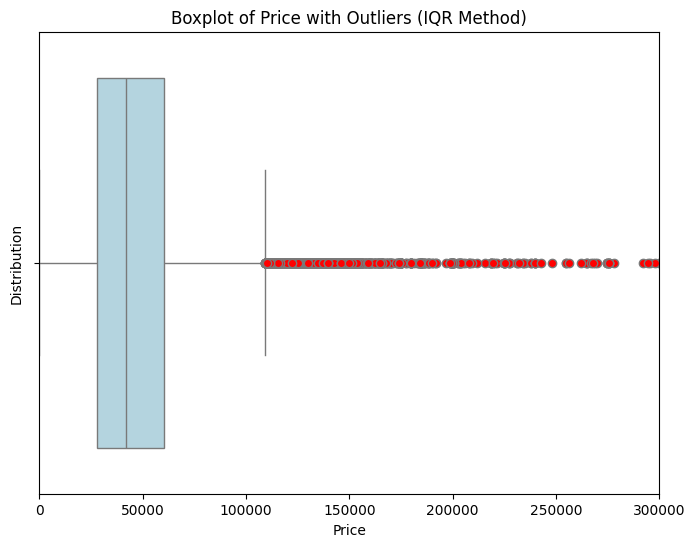

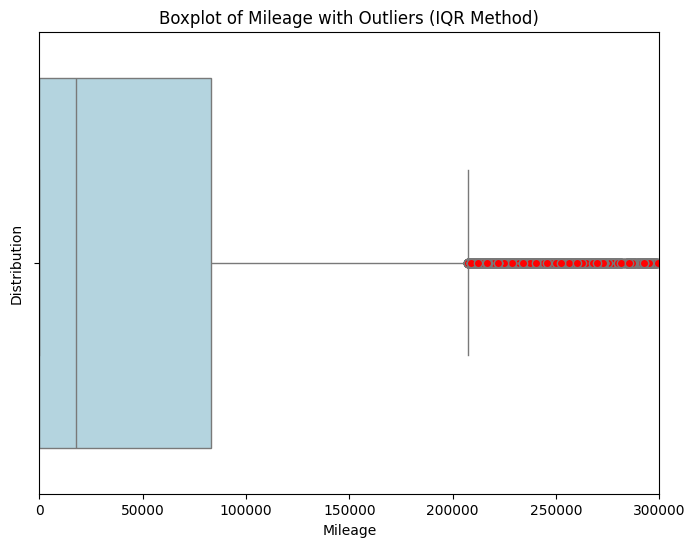

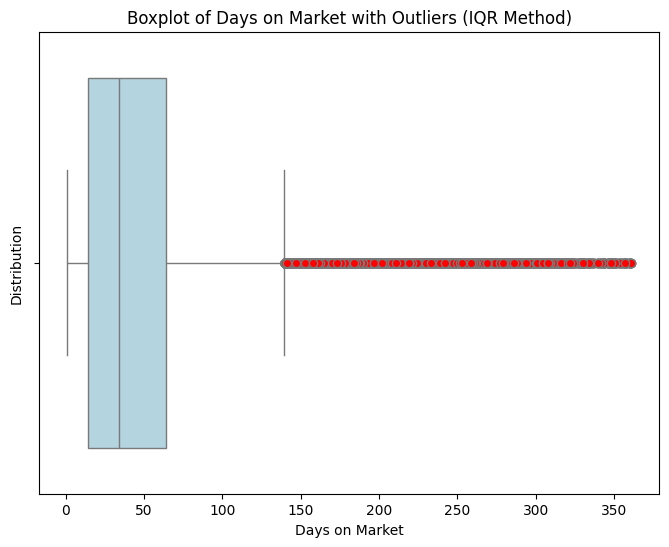

In [ ]:
df_outlier = df_sold.copy()

# calculate IQR and outlier bounds- price
Q1 = df_outlier['price'].quantile(0.25)
Q3 = df_outlier['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# mileage
Q1_mileage = df_outlier['mileage'].quantile(0.25)
Q3_mileage = df_outlier['mileage'].quantile(0.75)
IQR_mileage = Q3_mileage - Q1_mileage
lower_bound_mileage = Q1_mileage - 1.5 * IQR_mileage
upper_bound_mileage = Q3_mileage + 1.5 * IQR_mileage

#Days_on_market
Q1_days = df_outlier['days_on_market'].quantile(0.25)
Q3_days = df_outlier['days_on_market'].quantile(0.75)
IQR_days = Q3_days - Q1_days
lower_bound_days = Q1_days - 1.5 * IQR_days
upper_bound_days = Q3_days + 1.5 * IQR_days


# identify outliers
outliers = df_outlier[(df_outlier['price'] < lower_bound) | (df_outlier['price'] > upper_bound)]
outliers_mileage = df_outlier[(df_outlier['mileage'] < lower_bound_mileage) | (df_outlier['mileage'] > upper_bound_mileage)]
outliers_days = df_outlier[(df_outlier['days_on_market'] < lower_bound_days) | (df_outlier['days_on_market'] > upper_bound_days)]

# remove outliers
# create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x = 'price', data=df_outlier, color = 'lightblue', flierprops={'markerfacecolor': 'red', 'marker': 'o'})
plt.xlim(0, 200000)
plt.xticks(range(0, 300001, 50000))
plt.xlabel('Price')
plt.ylabel('Distribution')
plt.title('Boxplot of Price with Outliers (IQR Method)')

plt.show()

#Create a box plot for mileage
plt.figure(figsize=(8, 6))
sns.boxplot(x = 'mileage', data=df_outlier, color = 'lightblue', flierprops={'markerfacecolor': 'red', 'marker': 'o'})
plt.xlim(0, 200000)
plt.xticks(range(0, 300001, 50000))
plt.xlabel('Mileage')
plt.ylabel('Distribution')
plt.title('Boxplot of Mileage with Outliers (IQR Method)')

plt.show()

#create a boxplot for days_on_market
plt.figure(figsize=(8, 6))
sns.boxplot(x = 'days_on_market', data=df_outlier, color = 'lightblue', flierprops={'markerfacecolor': 'red', 'marker': 'o'})
plt.xlabel('Days on Market')
plt.ylabel('Distribution')
plt.title('Boxplot of Days on Market with Outliers (IQR Method)')

plt.show()






With median imputation outliers are still showing up in data, therefore we decided to use :

Winsorization method:
This approach involves modifying the weights of outliers or replacing the values being tested for outliers with expected values. The weight modification method allows weight modification without discarding or replacing the values of outliers, limiting the influence of the outliers.

limits=[0.05, 0.05]: The top 5% of the data is replaced by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value of the data at the 5th percentile.

In [ ]:
# Apply Winsorization
for column in ['price', 'days_on_market', 'mileage']:
    df_outlier[column] = winsorize(df_outlier[column], limits=[0.05, 0.05])


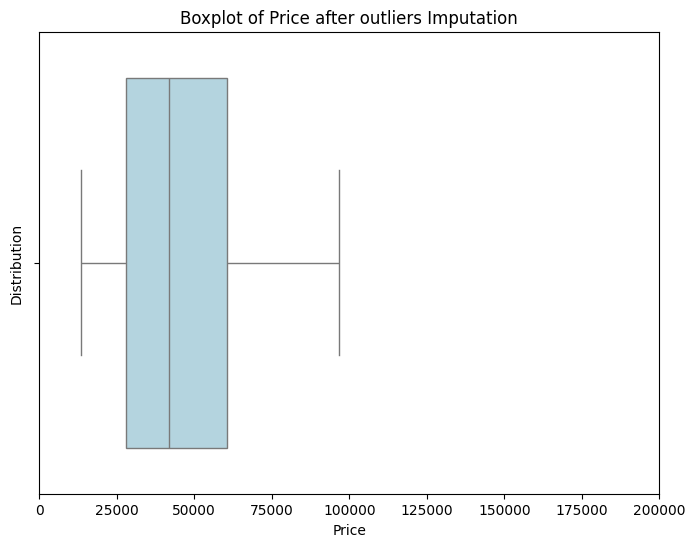

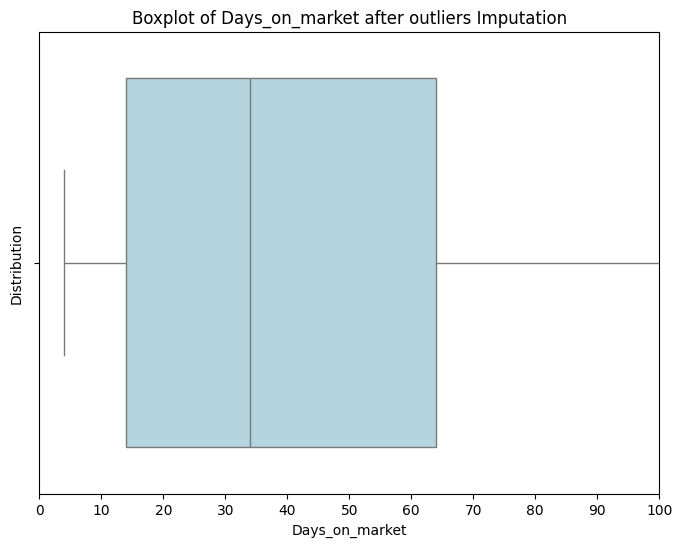

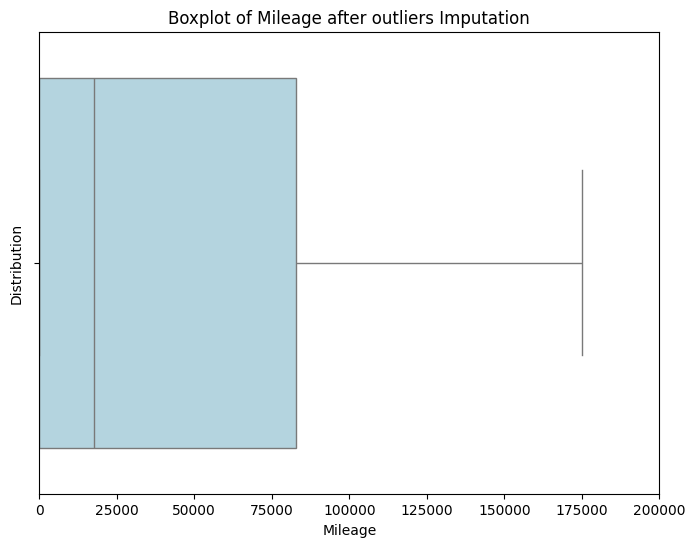

In [ ]:
def create_boxplot_after_winsorization(data, column, xlim_max, xtick_interval):

    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column, data=data, color='lightblue', flierprops={'markerfacecolor': 'red', 'marker': 'o'})

    plt.xlim(0, xlim_max)
    plt.xticks(range(0, xlim_max + 1, xtick_interval))

    plt.xlabel(column.capitalize())  # Use column name for label
    plt.ylabel('Distribution')
    plt.title(f'Boxplot of {column.capitalize()} after outliers Imputation')
    plt.show()

# Create boxplots for 'price', 'days_on_market', and 'mileage' after Winsorization
create_boxplot_after_winsorization(df_outlier, 'price', 200000, 25000)
create_boxplot_after_winsorization(df_outlier, 'days_on_market', 100, 10)
create_boxplot_after_winsorization(df_outlier, 'mileage', 200000, 25000)

In [ ]:
df_sold[['price','mileage','days_on_market']].describe()

price        mileage  days_on_market
count  9.813000e+04   98130.000000    98130.000000
mean   4.811993e+04   48484.096729       51.741904
std    1.079996e+05   62988.480146       58.274086
min    1.000000e+00       0.000000        1.000000
25%    2.790700e+04      15.000000       14.000000
50%    4.199200e+04   17771.500000       34.000000
75%    6.048650e+04   82966.500000       64.000000
max    1.309532e+07  991436.000000      361.000000

In [ ]:
df_outlier[['price','mileage','days_on_market']].describe()

price        mileage  days_on_market
count  98130.000000   98130.000000    98130.000000
mean   45791.276246   46100.192561       48.633517
std    22824.278527   55874.150454       47.145949
min    13309.000000       0.000000        4.000000
25%    27907.000000      15.000000       14.000000
50%    41992.000000   17771.500000       34.000000
75%    60486.500000   82966.500000       64.000000
max    96674.000000  175082.000000      186.000000

Outliers are handeled here

#Visualizations

In [ ]:
#Preparing Pie chart
pie_chart_data = df_outlier['make'].value_counts(normalize=True).reset_index()
pie_chart_data.columns = ['make', 'percentage']
pie_chart_data['percentage'] *= 100  # Convert proportions to percentages

#filter out makes with less than 3% and group them under 'Other'
other_makes = pie_chart_data[pie_chart_data['percentage'] < 3]['make'].tolist()
other_percentages = pie_chart_data[pie_chart_data['percentage'] < 3]['percentage'].tolist()
other_percentage = sum(other_percentages)

pie_chart_data = pie_chart_data[pie_chart_data['percentage'] >= 3]
pie_chart_data = pd.concat([pie_chart_data, pd.DataFrame([{'make': 'Other', 'percentage': other_percentage}])], ignore_index=True)


In [ ]:
# Prepare hierarchical data for the Sunburst chart
labels = pie_chart_data['make'].tolist() + other_makes
parents = [''] * len(pie_chart_data) + ['Other'] * len(other_makes)
values = pie_chart_data['percentage'].tolist() + other_percentages

# Create Sunburst chart
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues="total",
    textinfo="label+percent parent"
))

# Update layout for better display
fig.update_layout(
    title="Interactive Distribution of Car Makes (Percentage Proportions)",
    margin=dict(t=50, l=0, r=0, b=0)
)

fig.show()

In [ ]:
#Filtering out new and used cars for further processing
df_used = df_outlier[df_outlier["stock_type"] == "USED"]
df_new = df_outlier[df_outlier["stock_type"] == "NEW"]

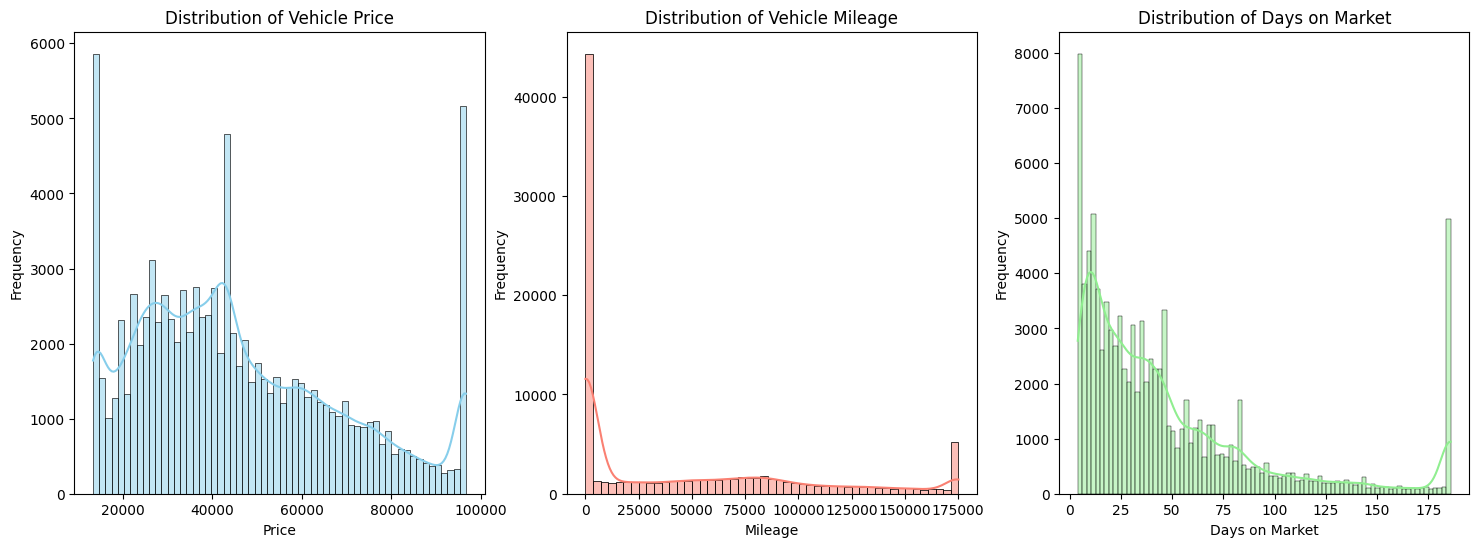

In [ ]:
#Distribution graph for vehicle based on price, mileage and days_on_market
# Create subplots for each variable
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Distribution of price
sns.histplot(df_outlier['price'], ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Distribution of Vehicle Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Distribution of mileage
sns.histplot(df_outlier['mileage'], ax=axes[1], kde=True, color='salmon')
axes[1].set_title('Distribution of Vehicle Mileage')
axes[1].set_xlabel('Mileage')
axes[1].set_ylabel('Frequency')

# Distribution of days_on_market
sns.histplot(df_outlier['days_on_market'], ax=axes[2], kde=True, color='lightgreen')
axes[2].set_title('Distribution of Days on Market')
axes[2].set_xlabel('Days on Market')
axes[2].set_ylabel('Frequency')

# Adjust layout and display the plots
#plt.tight_layout()
plt.show()

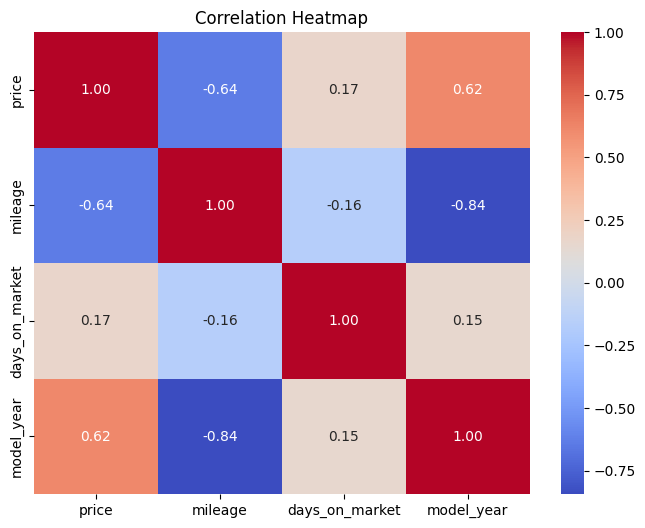

In [ ]:
#Corealation heatmap for vehicle key features
correlation_matrix = df_outlier[['price', 'mileage', 'days_on_market','model_year']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98130 entries, 1 to 145113
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   listing_type             98130 non-null  object        
 1   days_on_market           98130 non-null  int64         
 2   dealer_id                98130 non-null  int64         
 3   dealer_name              98130 non-null  object        
 4   dealer_city              98130 non-null  object        
 5   listing_first_date       98130 non-null  datetime64[ns]
 6   dealer_postal_code       98130 non-null  object        
 7   Latitude                 98130 non-null  float64       
 8   Longitude                98130 non-null  float64       
 9   stock_type               98130 non-null  object        
 10  vehicle_id               98130 non-null  int64         
 11  vin                      98130 non-null  object        
 12  mileage                  98130 non-n

In [ ]:
df_outlier['make'].unique()

array(['Chrysler', 'Volkswagen', 'Toyota', 'Mercury', 'BMW', 'Cadillac',
       'Honda', 'Jeep', 'Chevrolet', 'GMC', 'Jaguar', 'Ford',
       'Mercedes-Benz', 'Nissan', 'Subaru', 'Porsche', 'Buick', 'Pontiac',
       'Dodge', 'Infiniti', 'Lexus', 'Acura', 'Audi', 'Kia', 'Saturn',
       'Mazda', 'Mitsubishi', 'Suzuki', 'Lincoln', 'Hummer', 'Hyundai',
       'Land Rover', 'Mini', 'Volvo', 'Smart', 'Fiat', 'Ram', 'Scion',
       'Tesla', 'Maserati', 'Alfa Romeo', 'Genesis', 'Polestar', 'Rivian'],
      dtype=object)

In [ ]:
# General Motors (GM)
# Cadillac
# Chevrolet
# GMC
# Buick
# Pontiac (Discontinued)
# Saturn (Discontinued)
# Hummer (Now under GMC)

# Ford Motor Company
# Ford
# Lincoln
# Mercury (Discontinued)

# Stellantis (Formerly Fiat Chrysler Automobiles - FCA):
# Chrysler
# Jeep
# Dodge
# Ram
# Fiat
# Alfa Romeo
# Maserati


# Volkswagen Group
# Volkswagen
# Audi
# Porsche


# Toyota Motor Corporation
# Toyota
# Lexus
# Scion (Discontinued)

# Honda Motor Company
# Honda
# Acura

# Nissan Motor Company
# Nissan
# Infiniti


# Hyundai Motor Group
# Hyundai
# Kia
# Genesis

# BMW Group
# BMW
# Mini

# Mercedes-Benz Group
# Mercedes-Benz
# Smart

# Tata Motors (Jaguar Land Rover - JLR)
# Jaguar
# Land Rover

# Volvo Car Group
# Volvo
# Polestar

# Subaru Corporation
# Subaru

# Mitsubishi Motors
# Mitsubishi

# Suzuki Motor Corporation
# Suzuki

# Independent Automakers
# Tesla
# Rivian

In [ ]:
#Histogram of total price distribution by dealer_city
fig = px.histogram(df_outlier, x="dealer_city", y="price",
                   histfunc="sum",  # Use 'sum' to aggregate total price for each city
                   title="Total Price Distribution by Dealer City",
                   labels={"price": "Total Price", "dealer_city": "Dealer City"},
                   color_discrete_sequence=['darkgreen'])
fig.show()


In [ ]:
top_10_makes = df_outlier['make'].value_counts().nlargest(10).index
filtered_df = df_outlier[df_outlier['make'].isin(top_10_makes)]
city_make_counts = filtered_df.groupby(['dealer_city', 'make'])['make'].count().reset_index(name='count')

fig_histogram = px.histogram(city_make_counts,
                             x='dealer_city',
                             y='count',
                             color='make',
                             title="Sales Distribution of Top 10 Car Makes Across Cities",
                             labels={'dealer_city': 'City', 'count': 'Number of Car Models Sold'},
                             template='plotly_dark',
                             color_discrete_sequence=px.colors.qualitative.Set3)

fig_histogram.update_layout(barmode='stack')
fig_histogram.show()

# Create a bar chart for total counts
total_counts = filtered_df['make'].value_counts().reset_index()
total_counts.columns = ['make', 'total_count']

fig_bar = px.bar(total_counts,
                  x='make',
                  y='total_count',
                  title="Total Sales of Top 10 Car Makes Across cities",
                  labels={'make': 'Car Make', 'total_count': 'Total Sales'},
                  template='plotly_dark',
                  color_discrete_sequence=px.colors.qualitative.Set3)

fig_bar.show()

<ipython-input-131-4b4f02137b0f>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




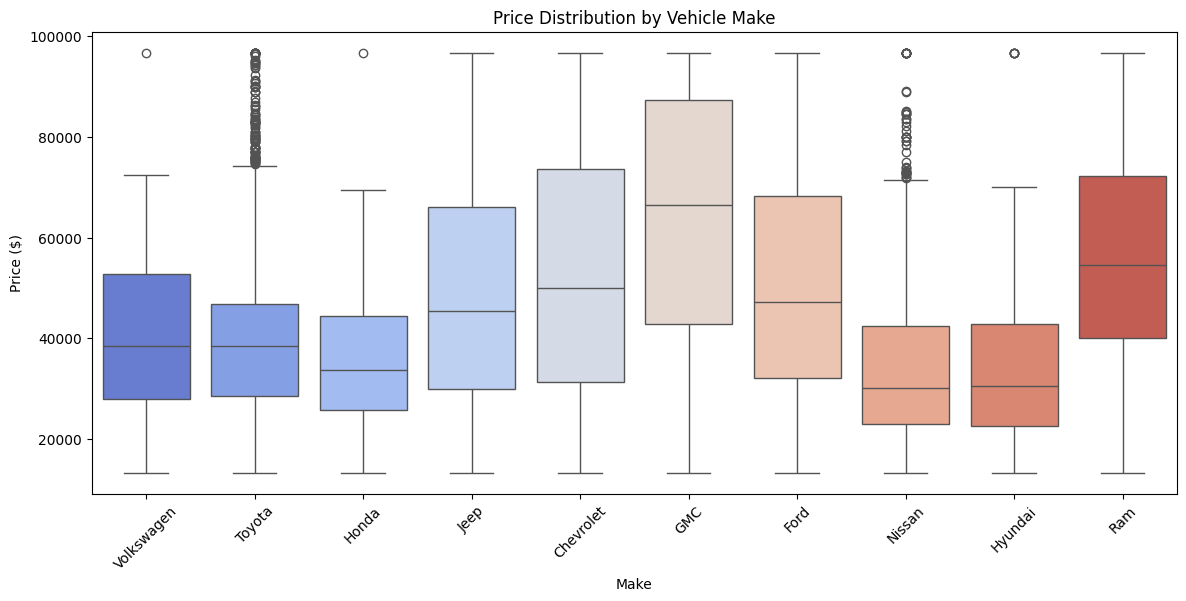

In [ ]:
#1. Boxplot : price distribution by make
plt.figure(figsize=(14, 6))
top_makes = df_outlier["make"].value_counts().head(10).index  # Select top 10 makes
sns.boxplot(data=df_outlier[df_outlier["make"].isin(top_makes)], x="make", y="price", palette="coolwarm")
plt.title("Price Distribution by Vehicle Make")
plt.xlabel("Make")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.show()





KDE Plot: Mileage Distribution for Best-Selling Postal Codes:analyze the average mileage of cars sold in top-performing regions.

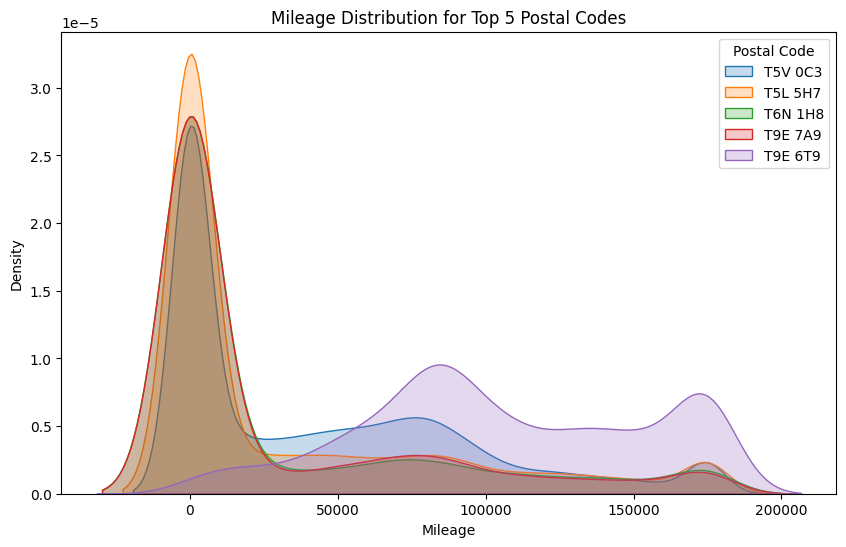

In [ ]:
plt.figure(figsize=(10, 6))
top_postal_codes = df_outlier["dealer_postal_code"].value_counts().head(5).index
for code in top_postal_codes:
    sns.kdeplot(df_outlier[df_outlier["dealer_postal_code"] == code]["mileage"], label=code, fill=True)
plt.title("Mileage Distribution for Top 5 Postal Codes")
plt.xlabel("Mileage")
plt.ylabel("Density")
plt.legend(title="Postal Code")
plt.show()

Pair Plot: Price vs. Mileage, Model Year, Days on Market

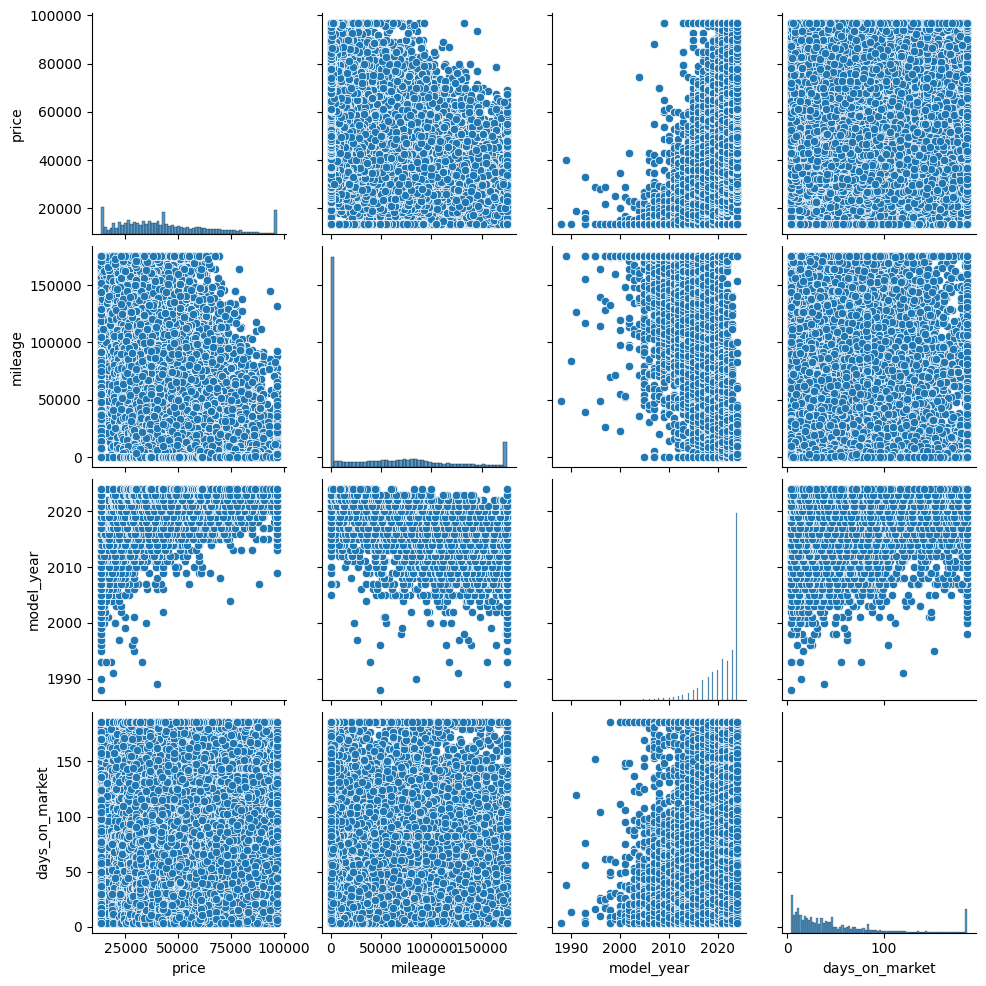

In [ ]:
sns.pairplot(df_outlier, vars=["price", "mileage", "model_year", "days_on_market"])
plt.show()

In [ ]:
df_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98130 entries, 1 to 145113
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   listing_type             98130 non-null  object        
 1   days_on_market           98130 non-null  int64         
 2   dealer_id                98130 non-null  int64         
 3   dealer_name              98130 non-null  object        
 4   dealer_city              98130 non-null  object        
 5   listing_first_date       98130 non-null  datetime64[ns]
 6   dealer_postal_code       98130 non-null  object        
 7   Latitude                 98130 non-null  float64       
 8   Longitude                98130 non-null  float64       
 9   stock_type               98130 non-null  object        
 10  vehicle_id               98130 non-null  int64         
 11  vin                      98130 non-null  object        
 12  mileage                  98130 non-n

In [ ]:
dealership_sales = df_outlier.groupby('dealer_name')['listing_type'].count().reset_index()
dealership_sales = dealership_sales.rename(columns={'listing_type': 'Total_vehicles_sold'})

brand_dealership_sales = df_outlier.groupby(['make', 'dealer_name'])['listing_type'].count().reset_index()
brand_dealership_sales = brand_dealership_sales.rename(columns={'listing_type': 'Brand_vehicle_sold'})

most_sold_brand_per_dealership = brand_dealership_sales.loc[brand_dealership_sales.groupby('dealer_name')['Brand_vehicle_sold'].idxmax()]
combined_sales = pd.merge(dealership_sales, most_sold_brand_per_dealership[['dealer_name', 'make', 'Brand_vehicle_sold']], on='dealer_name', how='left')

combined_sales = combined_sales.rename(columns={'make': 'most_sold_brand', 'Brand_vehicle_sold':'brand_vehicles_sold'})

# --- Merge total_vehicles_sold and most_sold_brand into df ---
# Drop any existing columns to avoid duplicates
df_outlier = df_outlier.drop(columns=['Total_vehicles_sold', 'most_sold_brand'],errors= 'ignore')

df_outlier = pd.merge(df_outlier, combined_sales[['dealer_name', 'Total_vehicles_sold', 'most_sold_brand']], on='dealer_name', how='left')

#calculate and merge total revenue
df_outlier.loc[:, 'revenue'] = df_outlier['price']
dealership_revenue = df_outlier.groupby('dealer_name')['revenue'].sum().reset_index()
dealership_revenue = dealership_revenue.rename(columns={'revenue': 'Total_revenue'})

#Drop any existing Total revenue column,
df_outlier = df_outlier.drop(columns=['Total_revenue'],errors= 'ignore')

df_outlier = pd.merge(df_outlier, dealership_revenue, on='dealer_name', how='left')

# --- Calculate and merge avg_days_on_market ---
dealership_avg_days = df_outlier.groupby('dealer_name')['days_on_market'].mean().reset_index()
dealership_avg_days = dealership_avg_days.rename(columns={'days_on_market': 'Avg_days_on_market'})

# Drop any existing avg_days_on_market column
df_outlier = df_outlier.drop(columns=['Avg_days_on_market'], errors='ignore')

df_outlier = pd.merge(df_outlier, dealership_avg_days, on='dealer_name', how='left')

# Now convert to integer and then to string
df_outlier['Avg_days_on_market'] = df_outlier['Avg_days_on_market'].astype(int).astype(str)
df_outlier['Total_vehicles_sold'] = df_outlier['Total_vehicles_sold'].fillna('0')




In [ ]:
app = dash.Dash(__name__)
app.layout = html.Div([
    html.Div([
        dcc.Input(id="search-input", type="text", placeholder="Search for a dealership..."),
        html.Button("Search", id="search-button")
    ], style={'display': 'flex', 'justifyContent': 'center', 'marginBottom': '10px'}),

    dcc.Graph(id='plotly-map', figure={},
              config={'scrollZoom': True})  # Add config for zoom on click
])
@app.callback(
    Output('plotly-map', 'figure'),
    [Input("search-button", "n_clicks")],  # Triggered by the search button
    [State("search-input", "value")]     # Get the search term
)

def update_plotly_map(n_clicks, search_term):
  filtered_df = df_outlier

  if search_term:
    filtered_df = filtered_df[filtered_df['dealer_name'].str.contains(search_term, case=False)]

  fig = px.scatter_mapbox(
      filtered_df,
      lat="Latitude",
      lon="Longitude",
      hover_name="dealer_name",
      size_max = 15,
      zoom = 11,
      mapbox_style = "open-street-map",
      color = 'Total_vehicles_sold',
      color_continuous_scale=px.colors.sequential.Viridis,
      range_color = [0, 3000],
      custom_data= ['dealer_name','dealer_postal_code', 'Total_vehicles_sold', 'Total_revenue','most_sold_brand', 'Avg_days_on_market']
  )
  min_marker_size = 12
  max_marker_size = 30
  scaling_factor = (max_marker_size - min_marker_size) / (filtered_df['Total_vehicles_sold'].max() - filtered_df['Total_vehicles_sold'].min())

  fig.update_traces(
      marker=dict(
          size=filtered_df['Total_vehicles_sold'] * scaling_factor + min_marker_size,
          opacity=0.7
      ),
      hovertemplate="<br>".join([
          "Dealer Name: %{customdata[0]}",
          "Total Vehicles Sold: %{customdata[1]}",
          "Total Revenue: %{customdata[2]}",
          "Most Sold Brand: %{customdata[3]}",
          "Average Days on Market: %{customdata[4]} days"
      ])
  )
  fig.update_layout(
      margin={"r": 0, "t": 0, "l": 0, "b": 0},
      showlegend = True,
      mapbox = dict(
          center = dict(lat = 53.5461, lon = -113.4938),
          zoom = 10,
          uirevision = 'foo'

      )
  )
  return fig

if __name__ == '__main__':
    app.run_server(debug=True)



<IPython.core.display.Javascript object>

Defining Region for map:

In [ ]:
#Using FSA method
#extract FSA from postal code
df_outlier['FSA_Code'] = df_outlier['dealer_postal_code'].str.replace(" ", "").str[:3]



In [ ]:
df_outlier['FSA_Code'].unique()

array(['T6V', 'T6X', 'T6E', 'T9E', 'T5V', 'T5L', 'T5J', 'T8H', 'T6H',
       'T5B', 'T5A', 'T5Y', 'T5S', 'T5E', 'T7X', 'T8N', 'T5R', 'T8L',
       'T6B', 'T5G', 'T6A', 'T6N', 'T6W', 'T5W', 'T6K', 'T5H', 'T6C',
       'T5C', 'T6J', 'T8A', 'T5T', 'T5M', 'T9G', 'T5P'], dtype=object)

In [ ]:
fsa_region_mapping = {
    'T6V': 'Northwest Edmonton',
    'T6X': 'Southeast Edmonton',
    'T6E': 'Central East Edmonton',
    'T9E': 'Leduc',
    'T5V': 'Northwest Industrial Edmonton',
    'T5L': 'North Central Edmonton',
    'T5J': 'Downtown Edmonton',
    'T8H': 'Sherwood Park',
    'T6H': 'Southwest Edmonton',
    'T5B': 'Northeast Central Edmonton',
    'T5A': 'Northeast Edmonton',
    'T5Y': 'Northeast Edmonton',
    'T5S': 'West Edmonton',
    'T5E': 'Northeast Edmonton',
    'T7X': 'Spruce Grove',
    'T8N': 'St. Albert',
    'T5R': 'West Edmonton',
    'T8L': 'Fort Saskatchewan',
    'T6B': 'Southeast Industrial Edmonton',
    'T5G': 'North Central Edmonton',
    'T6A': 'Southeast Central Edmonton',
    'T6N': 'South Edmonton',
    'T6W': 'Southwest Edmonton',
    'T5W': 'Northeast Edmonton',
    'T6K': 'South Central Edmonton',
    'T5H': 'Central East Edmonton',
    'T6C': 'Central Southeast Edmonton',
    'T5C': 'Northeast Edmonton',
    'T6J': 'Southwest Edmonton',
    'T8A': 'Sherwood Park',
    'T5T': 'West Edmonton',
    'T5M': 'North Central Edmonton',
    'T9G': 'Devon',
    'T5P': 'West Edmonton'
}
print(fsa_region_mapping['T6V'])



Northwest Edmonton


In [ ]:
#Now implement fsa_region_mapping in the dataframe
df_outlier['fsa_region_mapping'] = df_outlier['FSA_Code'].map(fsa_region_mapping)

In [ ]:
df_region = df_outlier.copy()



In [ ]:
#Now implement fsa_region_mapping in the dataframe
df_region['Region'] = df_outlier['FSA_Code'].map(fsa_region_mapping)


In [ ]:
df_region.head()

listing_type  days_on_market  dealer_id           dealer_name dealer_city  \
0         Sold               4   11131329      Redlinemotors.Ca    Edmonton   
1         Sold              38   11131738  Southgate Volkswagen    Edmonton   
2         Sold              14   11131329      Redlinemotors.Ca    Edmonton   
3         Sold             120   11130327    Mel-Ben Auto Sales    Edmonton   
4         Sold              13   11129347   House Of Cars Leduc       Leduc   

  listing_first_date dealer_postal_code   Latitude   Longitude stock_type  \
0         2024-07-20            T6V 1H4  53.604536 -113.578942       USED   
1         2024-03-26            T6X 1A1  53.421713 -113.489730       USED   
2         2024-05-31            T6V 1H4  53.604536 -113.578942       USED   
3         2024-03-06            T6E 0G7  53.499461 -113.483908       USED   
4         2024-04-16            T9E 6T9  53.281782 -113.546323       USED   

   ...  fuel_type_from_vin listing_dropoff_date  Total_vehicles_sold  \
0  ...                 Gas           2024-07-24                   43   
1  ...                 Gas           2024-05-03                  279   
2  ...                 Gas           2024-06-14                   43   
3  ...                 Gas           2024-07-04                   24   
4  ...                 Gas           2024-04-29                 1841   

   most_sold_brand  revenue Total_revenue Avg_days_on_market FSA_Code  \
0             Ford    13309        599206                 69      T6V   
1       Volkswagen    39900      11812206                 51      T6X   
2             Ford    13309        599206                 69      T6V   
3        Chevrolet    19000        345244                 56      T6E   
4             Ford    13309      57239937                 16      T9E   

      fsa_region_mapping                 Region  
0     Northwest Edmonton     Northwest Edmonton  
1     Southeast Edmonton     Southeast Edmonton  
2     Northwest Edmonton     Northwest Edmonton  
3  Central East Edmonton  Central East Edmonton  
4                  Leduc                  Leduc  

[5 rows x 34 columns]

In [ ]:

# Calculate regional sales
region_sales = df_region.groupby('Region')['listing_type'].count().reset_index()
region_sales = region_sales.rename(columns={'listing_type': 'Region_vehicle_sold'})

# Calculate number of dealerships in each region
region_dealerships = df_region.groupby('Region')['dealer_name'].nunique().reset_index()
region_dealerships = region_dealerships.rename(columns={'dealer_name': 'Region_dealerships'})

# Initialize the region_data DataFrame with region_sales
region_data = region_sales.copy()

# Merge region_dealerships into region_data
region_data = pd.merge(region_data, region_dealerships, on='Region', how='left')

# --- Functions to calculate and merge regional data ---
def merge_regional_data(region_data, df, group_cols, agg_col, agg_func, new_col_name):
    """
    Calculates regional data using groupby and agg, and merges it into region_data.

    Args:
        region_data: The DataFrame to merge the data into.
        df: The DataFrame to calculate regional data from.
        group_cols: Columns to group by.
        agg_col: Column to aggregate.
        agg_func: Aggregation function (e.g., 'count', 'nunique', 'mean').
        new_col_name: Name of the new column to store the aggregated data.
    """
    regional_data = df.groupby(group_cols)[agg_col].agg(agg_func).reset_index()
    regional_data = regional_data.rename(columns={agg_col: new_col_name})
    region_data = pd.merge(region_data, regional_data, on='Region', how='left')
    return region_data


# Merge most_sold_brand_per_region
region_data = merge_regional_data(
    region_data, df_region, ['Region', 'make'], 'listing_type', 'count', 'Most_sold_brand_count'
)
region_data = region_data.loc[region_data.groupby('Region')['Most_sold_brand_count'].idxmax()]
region_data = region_data.rename(columns={'make': 'Most_sold_brand'})
region_data = region_data[['Region', 'Region_vehicle_sold', 'Region_dealerships', 'Most_sold_brand']]
#merge most_seld_model_per_region
region_data = merge_regional_data(
    region_data, df_region, ['Region', 'model'], 'listing_type', 'count', 'Most_sold_model_count'
)
region_data = region_data.loc[region_data.groupby('Region')['Most_sold_model_count'].idxmax()]
region_data = region_data.rename(columns={'model': 'Most_sold_model'})
region_data = region_data[['Region', 'Region_vehicle_sold', 'Region_dealerships', 'Most_sold_brand', 'Most_sold_model']]



# Merge top_performing_dealerships
region_data = merge_regional_data(
    region_data, df_region, ['Region', 'dealer_name'], 'listing_type', 'count', 'Top_performing_dealerships_count'
)
region_data = region_data.loc[region_data.groupby('Region')['Top_performing_dealerships_count'].idxmax()]
region_data = region_data.rename(columns={'dealer_name': 'Top_performing_dealerships'})
region_data = region_data[['Region', 'Region_vehicle_sold', 'Region_dealerships', 'Most_sold_brand','Most_sold_model', 'Top_performing_dealerships']]


# Merge most_sold_month_per_region
df_region['month'] = df_region['listing_dropoff_date'].dt.month
region_data = merge_regional_data(
    region_data, df_region, ['Region', 'month'], 'listing_type', 'count', 'Most_sold_month_count'
)
region_data = region_data.loc[region_data.groupby('Region')['Most_sold_month_count'].idxmax()]
region_data = region_data.rename(columns={'month': 'Most_sold_month'})
region_data = region_data[['Region', 'Region_vehicle_sold', 'Region_dealerships', 'Most_sold_brand', 'Most_sold_model','Top_performing_dealerships', 'Most_sold_month']]


# Merge most_sold_stock_type_per_region
region_data = merge_regional_data(
    region_data, df_region, ['Region', 'stock_type'], 'listing_type', 'count', 'Most_sold_stock_type_count'
)
region_data = region_data.loc[region_data.groupby('Region')['Most_sold_stock_type_count'].idxmax()]
region_data = region_data.rename(columns={'stock_type': 'Most_sold_stock_type'})
region_data = region_data[['Region', 'Region_vehicle_sold', 'Region_dealerships', 'Most_sold_brand', 'Most_sold_model','Top_performing_dealerships', 'Most_sold_month', 'Most_sold_stock_type']]

# Merge most_sold_stock_type_per_region
region_data = merge_regional_data(
    region_data, df_region, ['Region', 'stock_type'], 'listing_type', 'count', 'Most_sold_stock_type_count'
)
region_data = region_data.loc[region_data.groupby('Region')['Most_sold_stock_type_count'].idxmax()]
region_data = region_data.rename(columns={'stock_type': 'Most_sold_stock_type'})
region_data = region_data[['Region', 'Region_vehicle_sold', 'Region_dealerships', 'Most_sold_brand','Most_sold_model', 'Top_performing_dealerships', 'Most_sold_month', 'Most_sold_stock_type']]

# Merge average_mileage_per_region
region_data = merge_regional_data(
    region_data, df_region, ['Region'], 'mileage', 'mean', 'Average_mileage'
)

# Merge average_price_per_region
region_data = merge_regional_data(
    region_data, df_region, ['Region'], 'price', 'mean', 'Average_price'
)

# Merge most_sold_style_per_region
region_data = merge_regional_data(
    region_data, df_region, ['Region', 'style'], 'listing_type', 'count', 'Most_sold_style_count'
)
region_data = region_data.loc[region_data.groupby('Region')['Most_sold_style_count'].idxmax()]
region_data = region_data.rename(columns={'style': 'Most_sold_style'})
region_data = region_data.drop(columns=['Most_sold_style_count'])  # Drop unnecessary column

# Merge most_sold_color_per_region
region_data = merge_regional_data(
    region_data, df_region, ['Region', 'exterior_color'], 'listing_type', 'count', 'Most_sold_color_count'
)
region_data = region_data.loc[region_data.groupby('Region')['Most_sold_color_count'].idxmax()]
region_data = region_data.rename(columns={'exterior_color': 'Most_sold_color'})
region_data = region_data.drop(columns=['Most_sold_color_count'])  # Drop unnecessary column

#merge fuel_type_per_region
region_data = merge_regional_data(
    region_data, df_region, ['Region', 'fuel_type_from_vin'], 'listing_type', 'count', 'Popular_fuel_type_count'
)
region_data = region_data.loc[region_data.groupby('Region')['Popular_fuel_type_count'].idxmax()]
region_data = region_data.rename(columns={'fuel_type_from_vin': 'Popular_fuel_type'})
region_data = region_data.drop(columns=['Popular_fuel_type_count'])  # Drop unnecessary column



In [ ]:
df_new

listing_type  days_on_market  dealer_id  \
946            Sold              21   11126912   
10901          Sold               4   11244933   
16271          Sold               4   11244933   
29805          Sold              67   11127438   
34266          Sold               4   11244933   
...             ...             ...        ...   
145107         Sold              87   11132447   
145108         Sold              82   11132447   
145109         Sold              99   11132447   
145110         Sold              96   11132447   
145112         Sold              71   11132447   

                                  dealer_name dealer_city listing_first_date  \
946                             Alberta Honda    Edmonton         2024-04-30   
10901                              AutoCanada    Edmonton         2024-07-23   
16271                              AutoCanada    Edmonton         2024-07-24   
29805   Barnes Harley-Davidson South Edmonton    Edmonton         2024-05-20   
34266                              AutoCanada    Edmonton         2024-07-26   
...                                       ...         ...                ...   
145107                    Volvo Cars Edmonton    Edmonton         2024-03-05   
145108                    Volvo Cars Edmonton    Edmonton         2024-03-05   
145109                    Volvo Cars Edmonton    Edmonton         2024-03-05   
145110                    Volvo Cars Edmonton    Edmonton         2024-03-05   
145112                    Volvo Cars Edmonton    Edmonton         2024-03-20   

       dealer_postal_code   Latitude   Longitude stock_type  ...        model  \
946               T5E 6M7  53.584443 -113.489058        NEW  ...        Camry   
10901             T5V 0C3  53.576926 -113.589133        NEW  ...       Malibu   
16271             T5V 0C3  53.576926 -113.589133        NEW  ...  Sierra 1500   
29805             T6W 1A1  53.420286 -113.494915        NEW  ...       Accord   
34266             T5V 0C3  53.576926 -113.589133        NEW  ...   Highlander   
...                   ...        ...         ...        ...  ...          ...   
145107            T6X 1A1  53.421713 -113.489730        NEW  ...         XC90   
145108            T6X 1A1  53.421713 -113.489730        NEW  ...         XC90   
145109            T6X 1A1  53.421713 -113.489730        NEW  ...         XC90   
145110            T6X 1A1  53.421713 -113.489730        NEW  ...         XC90   
145112            T6X 1A1  53.421713 -113.489730        NEW  ...         XC90   

                   series            style                 exterior_color  \
946                    LE         4D Sedan                          Black   
10901                  LT         4D Sedan                          Black   
16271                Base  Reg Cab LWB 4WD                          Black   
29805              Hybrid         4D Sedan          Champagne Frost Pearl   
34266      Hybrid Limited   4D Utility AWD                          Black   
...                   ...              ...                            ...   
145107  Recharge Ultimate   4D Utility AWD         Crystal White Metallic   
145108  Recharge Ultimate   4D Utility AWD                           Grey   
145109  Recharge Ultimate   4D Utility AWD  Gray (platinum Grey Metallic)   
145110  Recharge Ultimate   4D Utility AWD    Gray (vapour Grey Metallic)   
145112  Recharge Ultimate   4D Utility AWD            Onyx Black Metallic   

        exterior_color_category                               interior_color  \
946                       white                                        Black   
10901                     white                                        Black   
16271                     white                                        Black   
29805              yellow,beige                                  Ivory Cloth   
34266                     white                                        Black   
...                         ...                                    

In [ ]:
region_data
region_data.to_csv('region_data.csv', index=False)

In [ ]:
# Merge region_data into df_region based on 'Region'
df_region = pd.merge(df_region, region_data, on='Region', how='left')


In [ ]:
df_region

listing_type  days_on_market  dealer_id           dealer_name  \
0             Sold               4   11131329      Redlinemotors.Ca   
1             Sold              38   11131738  Southgate Volkswagen   
2             Sold              14   11131329      Redlinemotors.Ca   
3             Sold             120   11130327    Mel-Ben Auto Sales   
4             Sold              13   11129347   House Of Cars Leduc   
...            ...             ...        ...                   ...   
98125         Sold              99   11132447   Volvo Cars Edmonton   
98126         Sold              96   11132447   Volvo Cars Edmonton   
98127         Sold              22   11132447   Volvo Cars Edmonton   
98128         Sold              71   11132447   Volvo Cars Edmonton   
98129         Sold               4   11204118        Southgate Audi   

      dealer_city listing_first_date dealer_postal_code   Latitude  \
0        Edmonton         2024-07-20            T6V 1H4  53.604536   
1        Edmonton         2024-03-26            T6X 1A1  53.421713   
2        Edmonton         2024-05-31            T6V 1H4  53.604536   
3        Edmonton         2024-03-06            T6E 0G7  53.499461   
4           Leduc         2024-04-16            T9E 6T9  53.281782   
...           ...                ...                ...        ...   
98125    Edmonton         2024-03-05            T6X 1A1  53.421713   
98126    Edmonton         2024-03-05            T6X 1A1  53.421713   
98127    Edmonton         2024-05-06            T6X 1A1  53.421713   
98128    Edmonton         2024-03-20            T6X 1A1  53.421713   
98129    Edmonton         2024-07-20            T6X 1A1  53.421713   

        Longitude stock_type  ...  Most_sold_model Top_performing_dealerships  \
0     -113.578942       USED  ...             F150                  City Ford   
1     -113.489730       USED  ...               Q5            Go Nissan South   
2     -113.578942       USED  ...             F150                  City Ford   
3     -113.483908       USED  ...      Sierra 1500         Lakewood Chevrolet   
4     -113.546323       USED  ...             F150                 L.A. Mazda   
...           ...        ...  ...              ...                        ...   
98125 -113.489730        NEW  ...               Q5            Go Nissan South   
98126 -113.489730        NEW  ...               Q5            Go Nissan South   
98127 -113.489730       USED  ...               Q5            Go Nissan South   
98128 -113.489730        NEW  ...               Q5            Go Nissan South   
98129 -113.489730       USED  ...               Q5            Go Nissan South   

       Most_sold_month  Most_sold_stock_type  Most_sold_stock_type  \
0                    7                   NEW                   NEW   
1                    7                   NEW                   NEW   
2                    7                   NEW                   NEW   
3                    6                  USED                  USED   
4                    5                  USED                  USED   
...                ...                   ...                   ...   
98125                7                   NEW                   NEW   
98126                7                   NEW                   NEW   
98127                7                   NEW                   NEW   
98128                7                   NEW                   NEW   
98129                7                   NEW                   NEW   

      Average_mileage Average_price    Most_sold_style Most_sold_color  \
0        47351.513915  44480.849722  Supercrew SWB 4WD           Black   
1        34816.816667  49346.185632     4D Utility AWD           Black   
2        47351.513915  44480.849722  Supercrew SWB 4WD           Black   
3        59264.076489  45472.168378     4D Utility AWD           Black   
4        56910.298389  42546.361896     4D Utility AWD           Black   
...               ...           ...                ...

In [ ]:
#Ploting the map of edmonton region with different colours
fig = px.scatter_mapbox(
    df_outlier,
    lat="Latitude",
    lon="Longitude",
    hover_name="dealer_name",
    color="FSA_Code",
    color_discrete_sequence=px.colors.qualitative.Set3,
    zoom=10,
    mapbox_style="open-street-map",
    center={"lat": 53.5461, "lon": -113.4938}
)
fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    mapbox=dict(
        zoom=10,
        style="carto-positron",
        center=dict(lat=53.5461, lon=-113.4938)
    )
)
fig.show(config={'scrollZoom': True})


Problem statement #5: Best Selling Regions (Clustering)
Goal: Analyze and identify geographical clusters within Edmonton where vehicles sell the best, based on the number
of sales and total gross sales by dealership postal codes. This will allow dealerships to target marketing efforts more
effectively and optimize inventory distribution across different regions of the city.
